In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
gdrive_path = f"/content/gdrive/MyDrive/stat_ml/"

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/stat_ml/clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [5]:
feature_cols = ["ApplicantIncome", "LoanAmount"]

X = data[feature_cols].copy()
X.head()

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0
2,2583,120.0
3,6000,141.0
4,2333,95.0


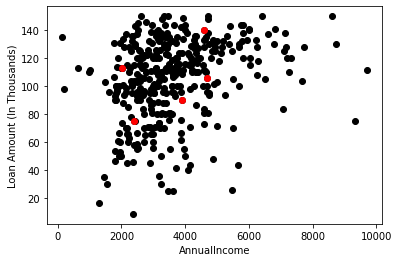

,ApplicantIncome,LoanAmount
0,2031,113.0
1,4692,106.0
2,2400,75.0
3,3900,90.0
4,4608,140.0


In [6]:
K=5
# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

Centroids.reset_index(inplace=True, drop=True)
Centroids

In [7]:
# calculate distance
def distance(data_row, centr):
  d = 0
  for col in feature_cols:
    d += (centr[col] - data_row[col])**2

  return np.sqrt(d)

# get name of the min column representing K clusters
def nearest(row, K):
  subset = row[list(range(K))]
  return subset.idxmin()

In [8]:
diff = 1
while(diff != 0):
  for k, centr in Centroids.iterrows():
    X[k] = X.apply(distance, args=(centr,), axis=1)

  X['Cluster'] = X.apply(nearest, args=(K,), axis=1)

  Centroids_new = X.groupby(["Cluster"]).mean()[feature_cols]
  diff = 0
  for col in feature_cols:
    diff += (Centroids_new[col] - Centroids[col]).sum()
  print(f"Difference:\t{diff.sum()}")

  Centroids = X.groupby(["Cluster"]).mean()[feature_cols]
  Centroids.reset_index(inplace=True, drop=True)
  print(f"Estimated centroids:\n{Centroids}")

Difference:	764.6673588249989
Estimated centroids:
   ApplicantIncome  LoanAmount
0      1786.500000   89.960000
1      5866.140845  117.394366
2      2687.387387  101.000000
3      3604.557377  105.245902
4      4446.074074  115.407407
Difference:	611.3127574871523
Estimated centroids:
   ApplicantIncome  LoanAmount
0      1811.245283   88.433962
1      6427.304348  119.391304
2      2700.268519  102.055556
3      3532.870370  105.425926
4      4531.666667  112.318182
Difference:	301.23875389511386
Estimated centroids:
   ApplicantIncome  LoanAmount
0      1827.054545   89.545455
1      6627.102564  120.589744
2      2708.839623  101.735849
3      3532.870370  105.425926
4      4606.698630  112.356164
Difference:	143.1327176987989
Estimated centroids:
   ApplicantIncome  LoanAmount
0      1827.054545   89.545455
1      6721.277778  122.305556
2      2708.839623  101.735849
3      3537.614679  105.724771
4      4649.733333  111.520000
Difference:	90.50290552584711
Estimated centroids:


In [9]:
X.head()

,ApplicantIncome,LoanAmount,0,1,2,3,4,Cluster
0,4583,128.0,2724.341566,2504.851777,1801.032135,917.921705,309.728583,4
1,3000,66.0,1141.349738,4088.239254,220.716102,666.537577,1893.071891,2
2,2583,120.0,724.681639,4504.846958,200.017007,1082.438401,2309.450443,2
3,6000,141.0,4141.391519,1088.000196,3218.079668,2334.918929,1107.866915,1
4,2333,95.0,474.105227,4754.926793,449.209857,1332.389900,2559.520537,2


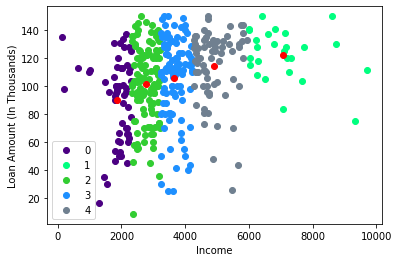

2    117
3    107
4     72
0     59
1     26
Name: Cluster, dtype: int64

In [10]:
color=['indigo','springgreen', "limegreen", "dodgerblue", "slategray"]

for k in range(K):
  data=X[X["Cluster"]==k]
  plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k], label=f"{k}")

plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend()
plt.show()
X['Cluster'].value_counts()

k-means clustering using 5 centers was initialized and converged on the criterion of centroids difference.
2nd and 3rd clusters cover the densest region of data points, 0th and 1st contain lower and upper "outliers" of the income feature, and 4th cluster takes the rest of the middle. 



In [11]:
data=pd.read_csv("/content/gdrive/MyDrive/stat_ml/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
# standardizing the data
scaler = StandardScaler()
# statistics of scaled data
data_scaled = pd.DataFrame(scaler.fit_transform(data.values), columns=data.columns, index=data.index)
data_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [14]:
data_scaled.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [15]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')
# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)
kmeans.inertia_

2599.3855593561393

Text(0, 0.5, 'Inertia')

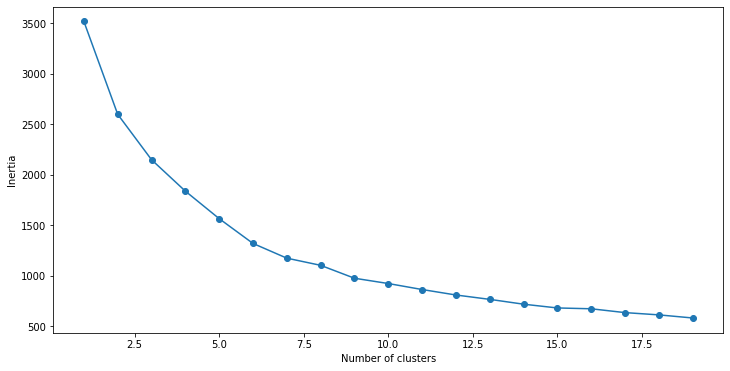

In [16]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  SSE.append(kmeans.inertia_)
  
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
# k means using 8 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 8, init='k-means++', verbose=1)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
data['cluster'] = pred
data['cluster'].value_counts()

Initialization complete
Iteration 0, inertia 1808.0742293442922
Iteration 1, inertia 1235.9189618972507
Iteration 2, inertia 1167.0862259499
Iteration 3, inertia 1122.503731785936
Iteration 4, inertia 1095.754882575889
Iteration 5, inertia 1084.4590530816959
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1758.3835508367335
Iteration 1, inertia 1245.0064836027072
Iteration 2, inertia 1221.5520522061672
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1750.602124468638
Iteration 1, inertia 1210.2118572908707
Iteration 2, inertia 1209.7549064747318
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 1929.6752029599936
Iteration 1, inertia 1515.8773405604838
Iteration 2, inertia 1511.0979841867297
Iteration 3, inertia 1499.931076710337
Iteration 4, inertia 1474.2543472043358
Iteration 5, inertia 1421.8480874265751
Iteration 6, inertia 1413.602651117158
Iteration 7, i

1    175
6    100
3     84
5     41
4     26
2     11
0      2
7      1
Name: cluster, dtype: int64

In [26]:
kmeans.cluster_centers_

array([[-6.90297086e-01, -5.58343155e-02,  7.92784210e-01,
         5.61685048e-01, -1.13014360e-02,  9.25255676e+00,
        -4.64047057e-01,  9.33164138e-01,  1.00000000e+00],
       [-6.90297086e-01,  5.90668285e-01, -2.52033049e-01,
        -3.85809244e-01, -4.76606883e-01, -8.06492077e-02,
        -4.42468053e-01, -1.83933396e-01,  4.00000000e+00],
       [ 1.44865163e+00,  2.93864819e-03,  3.88728973e-01,
         3.94304862e+00,  4.02164626e+00,  3.57841274e-02,
         4.22611641e+00,  9.41635735e-01,  3.00000000e+00],
       [-6.13906060e-01, -1.57973330e+00, -1.31599379e-01,
        -3.60112219e-01, -4.18520004e-01,  3.81012185e-02,
        -4.38212425e-01, -1.45816851e-01,  2.00000000e+00],
       [ 1.44865163e+00, -1.39857049e+00, -6.19170690e-01,
         6.75296021e-01,  9.82271132e-01, -3.66322676e-01,
         1.11060854e+00, -6.23384778e-02,  7.00000000e+00],
       [-5.85958124e-01,  3.06837875e-01,  2.20613537e+00,
        -1.19291097e-01, -2.32891763e-01,  7.207433

In [24]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,7
4,2,3,22615,5410,7198,3915,1777,5185,1


data was normilized and clusted into 8 groups using k-means++ alghorithm, the number of clusters was chosen according to the inertia metric calculated for up to 20 centroids and shown above.  